In [4]:
from IPython.display import clear_output
import random
random.seed(37)
STARTMONEY = 300
def get_map():
    map = {
        0 : {"Type":"start", "Name":"start"},
        1 : {"Type":"house", 'Name': 'Mediterranean Avenue', 'Price': 60, 'Rent': 10, 'Owner': 'Unoccupied'},
        2 : {"Type":"special", "gain":50},
        3 : {"Type":"house", 'Name': 'Baltic Avenue', 'Price': 60, 'Rent': 20, 'Owner': 'Unoccupied'},
        4 : {"Type":"special", "gain":-50},
        5 : {"Type":"house", 'Name': 'Reading Railroad', 'Price': 150, 'Rent': 25, 'Owner': 'Unoccupied'},
        6 : {"Type":"house", 'Name': 'Oriental Avenue', 'Price': 100, 'Rent': 30, 'Owner': 'Unoccupied'},
        7 : {"Type":"card"},
        8 : {"Type":"house", 'Name': 'Vermont Avenue', 'Price': 100, 'Rent': 30, 'Owner': 'Unoccupied'},
        9 : {"Type":"house", 'Name': 'Connecticut Avenue', 'Price': 120, 'Rent': 40, 'Owner': 'Unoccupied'},
        10 : {"Type":"jail"},
        11 : {"Type":"house", 'Name': 'St.Charles Place', 'Price': 140, 'Rent': 50, 'Owner': 'Unoccupied'},
        12 : {"Type":"house", 'Name': 'Electric Company', 'Price': 150, 'Rent': 50, 'Owner': 'Unoccupied' },
        13 : {"Type":"house", 'Name': 'States Avenue', 'Price': 150, 'Rent': 30, 'Owner': 'Unoccupied'},
        14 : {"Type":"house", 'Name': 'Virginia Avenue', 'Price': 140, 'Rent': 50, 'Owner': 'Unoccupied'},
        15 : {"Type":"house", 'Name': 'Pennsylvania Railroad', 'Price': 200, 'Rent': 60, 'Owner': 'Unoccupied'},
        16 : {"Type":"house", 'Name': 'St.James Place', 'Price': 180, 'Rent': 50, 'Owner': 'Unoccupied'},
        17 : {"Type":"special", "gain":100 },
        18 : {"Type":"house", 'Name': 'Tennessee Avenue', 'Price': 180, 'Rent': 70, 'Owner': 'Unoccupied'},
        19 : {"Type":"house", 'Name': 'New York Avenue', 'Price': 180, 'Rent': 70, 'Owner': 'Unoccupied'},
        20 : {"Type":"special", "gain":0},
        21 : {"Type":"house", 'Name': 'Kentucky Avenue', 'Price': 200, 'Rent': 80, 'Owner': 'Unoccupied'},
        22 : {"Type":"card"},
        23 : {"Type":"house", 'Name': 'Indiana Avenue', 'Price': 220, 'Rent': 90, 'Owner': 'Unoccupied'},
        24 : {"Type":"house", 'Name': 'Illinois Avenue', 'Price': 240, 'Rent': 90, 'Owner': 'Unoccupied'},
        25 : {"Type":"house", 'Name': 'B & O. Railroad', 'Price': 200, 'Rent': 75, 'Owner': 'Unoccupied'},
        26 : {"Type":"house", 'Name': 'Atlantic Avenue', 'Price': 240, 'Rent': 100, 'Owner': 'Unoccupied'},
        27 : {"Type":"house", 'Name': 'Ventnor Avenue', 'Price': 260, 'Rent': 110, 'Owner': 'Unoccupied'},
        28 : {"Type":"special", "gain":-100},
        29 : {"Type":"house", 'Name': 'Marvin Gardens', 'Price': 260, 'Rent': 110, 'Owner': 'Unoccupied'},
        30 : {"Type":"jail"},
        31 : {"Type":"house", 'Name': 'Pacific Avenue', 'Price': 280, 'Rent': 120, 'Owner': 'Unoccupied'},
        32 : {"Type":"house", 'Name': 'North Carolina Avenue', 'Price': 300, 'Rent': 130, 'Owner': 'Unoccupied'},
        33 : {"Type":"special", "gain":150},
        34 : {"Type":"house", 'Name': 'Pennsylvania Avenue', 'Price': 300, 'Rent': 130, 'Owner': 'Unoccupied'},
        35 : {"Type":"house", 'Name': 'Short Line', 'Price': 300, 'Rent': 100, 'Owner': 'Unoccupied'},
        36 : {"Type":"card"},
        37 : {"Type":"house", 'Name': 'Park Place', 'Price': 350, 'Rent': 175, 'Owner': 'Unoccupied'},
        38 : {"Type":"special", "gain":-100},
        39 : {"Type":"house", 'Name': 'Boardwalk', 'Price': 400, 'Rent': 200, 'Owner': 'Unoccupied'},
    }
    return map



In [5]:
def play(STARTMONEY = 300, clear=True):
    
    map = get_map()
    
    owners = {
        'owner1': {
            "money":STARTMONEY*2,
            "position":0,
            "jailtime":0
        },
        'owner2': {
            "money":STARTMONEY*2,
            "position":0,
            "jailtime":0,
        }
    }

    def get_input(msg, canDeny=True):
        #inp = input(f "{msg} (y/n) ") #You can play the game manually by select y (Yes) or n (No)
        inp = 'y' #Input set to 'y' so all the decision are automaticcaly set to Yes for the sake of simulation
        if inp =="y":
            return True
        elif inp =="n" and canDeny:
            return False
        else:
            print("Input a valid value!")
            return get_input(msg, canDeny=canDeny)



    ownersNames = list(owners.keys())
    currIndex = 0
    turn = 2
    while turn//2<100:
        if not (all([owners[name]['money']>=0 for name in owners.keys()])):
            break

        ownerName = ownersNames[currIndex]

        #check if in jail
        if owners[ownerName]["jailtime"]>0:
            print(f"You still have {owners[ownerName]['jailtime']} turns left in jail")
            owners[ownerName]["jailtime"] -= 1


        else:
            print(f"Turn = {turn//2} Owner = {ownerName}, MoneyLeft = {owners[ownerName]['money']}, Position = {owners[ownerName]['position']}")
            inp = get_input("Roll the dice", canDeny=False)
            diceroll = random.choice([1,2,3,4,5,6])
            print(f"You rolled a {diceroll}!")
            owners[ownerName]['position'] += diceroll

            oldpos = owners[ownerName]['position']
            owners[ownerName]['position'] = owners[ownerName]['position']%40

            #give 750 if you cycled through start
            if owners[ownerName]['position'] <oldpos:
                print(f"Cycled through start, gain {STARTMONEY}")
                owners[ownerName]['money'] += STARTMONEY

            block = map[owners[ownerName]['position']]

            cardroll = 0

            if block['Type'] == 'card':
                cardroll = random.choice([0,1,2,3])
                if cardroll == 0:
                    print("Card 1 - Move 2 blocks and gain 200")
                    owners[ownerName]['position'] += 2
                    owners[ownerName]['money'] += 200
                elif cardroll == 1:
                    print("Card 2 - GO TO JAIL")
                    owners[ownerName]['position'] == 10
                    print("Landed on jail, +3 jail time")
                    owners[ownerName]['jailtime'] = 3
                elif cardroll == 2:
                    print(f"Card 3 - back to start, gain {STARTMONEY}")
                    owners[ownerName]['position'] == 0
                    owners[ownerName]['money'] += STARTMONEY
                else:
                    print("Card 4 - lose 100")
                    owners[ownerName]['money'] -= 100

            block = map[owners[ownerName]['position']]


            if block['Type'] == 'house' and cardroll == 0:
                #check if house is owned

                #your own house

                if block['Owner'] == ownerName:
                    print("Landed on your own place - do nothing")

                #other people's house

                elif block['Owner'] in ownersNames:
                    print(f"Landed on your {block['Owner']}'s house, pay {block['Rent']}" )
                    owners[ownerName]['money'] -= block['Rent']
                    owners[block['Owner']]['money'] += block['Rent']

                #land on empty block
                else:
                    if owners[ownerName]['money'] >= block['Price']:
                        inp = get_input(f"Buy the house {block['Name']}, price = {block['Price']}?", canDeny = True)
                        if inp:
                            print('You bought the house!')
                            owners[ownerName]['money'] -= block['Price']
                            block['Owner'] = ownerName
                        else:
                            print('You declined the purchases')
                    else: 
                        print(f"You'are too poor to but this house, needs{block['Price']}")
            elif block['Type'] == 'special' and cardroll == 0:
                print(f"Special block! you gained {block['gain']}")
                owners[ownerName]['money'] += block['gain']

            elif block['Type'] == 'jail' and cardroll == 0:
                print("Landed on jail, +3 jail time")
                owners[ownerName]['jailtime'] = 3

            elif block['Type'] == 'start':
                print('You landed on START') #placeholder

            else:
                print('Oh we are here!!!') 


        currIndex += 1
        currIndex = currIndex%2
        turn += 1


        print('==========================================')

    winner = None
    maxCoins = 0
    for owner in owners.keys():
        print(f"{owner} has {owners[owner]['money']} left.")
        if owners[owner]['money'] >= maxCoins:
            winner = owner
            maxCoins = owners[owner]['money']

    print(f"Winner is {winner}.")
    
    if clear:
        clear_output()
    return maxCoins
    
     


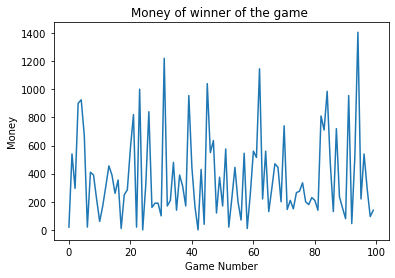

In [6]:
import numpy as np
import matplotlib.pyplot as plt

played = []
for i in range(100):
    played.append(play(STARTMONEY = 300))
    
plt.title(
  "Money of winner of the game "
)
plt.xlabel("Game Number")
plt.ylabel("Money")

x = range(len(played))

plt.plot(x, played)

plt.show()    

    
#y, binEdges = np.histogram(played, bins=10)
#bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
#plt.plot(bincenters, y, '-', c='black')